In [1]:
import os
import io
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib
#%matplotlib inline
from matplotlib import pyplot as plt
#plt.rcParams['figure.figsize'] = 12, 10

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from PIL import Image
from IPython.display import FileLink

import datetime as dt
from datetime import date, timedelta, datetime

import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor

from scipy import stats
import statsmodels.api as sm
from itertools import product

# import xgboost as xgb
# from xgboost import plot_tree
from matplotlib.pylab import rcParams

# from fbprophet import Prophet
# from fbprophet.make_holidays import make_holidays_df
# from fbprophet.diagnostics import cross_validation, performance_metrics
# from fbprophet.plot import plot_cross_validation_metric
# import holidays

# import tsaug
# from tsaug import AddNoise, Convolve, Crop, Drift, Pool, Quantize, Resize, Reverse, TimeWarp
# from tsaug.visualization import plot

# import warnings
# warnings.simplefilter('ignore')

In [3]:
import pandas as pd
# df =pd.read_csv("0_jy_interpol_v2.csv")
# nwp_cols = "lead_hr,NDNSW,SWDIR,SWDIF,TDSWS,NDNLW,OULWT,DLWS,NCPCP,SNOL,LSPRATE,LSSRATE,HPBLA,HFSOIL,LLRIB,UGRD,VGRD,HFSFC,XBLWS,YBLWS,LHTFL,TMP,TMIN,TMAX,SPFH,TOMFS,RH,VIS,FOGFR,DPT,PVIS5,15TL,15QT,VISIP,SHFLT-1,SHFLT-2,SHFLT-3,SHFLT-4,SHFLT-5,SHFLT-6,SHFLT-7,SHFLT-8,SHFLT-9,HTBM,SCST,DSCNC,DSCOC,NETTL-1,NETTL-2,NETTL-3,NETTL-4,NETTL-5,NETTL-6,NETTL-7,NETTL-8,NETTL-9,STOT-1,STOT-2,STOT-3,STOT-4,STOT-5,STOT-6,STOT-7,STOT-8,STOT-9,HCNP-1,HCNP-2,HCNP-3,HCNP-4,HCNP-5,WCNP-1,WCNP-2,WCNP-3,WCNP-4,WCNP-5,T15T-1,T15T-2,T15T-3,T15T-4,T15T-5,T15T-6,T15T-7,T15T-8,T15T-9,SH15-1,SH15-2,SH15-3,SH15-4,SH15-5,SH15-6,SH15-7,SH15-8,SH15-9,HDLB,STCP-1,STCP-2,STCP-3,STCP-4,STCP-5,MAXGUST,CBLT,SNOM,SMCL-1,SMCL-2,SMCL-3,SMCL-4,TSOIL-1,TSOIL-2,TSOIL-3,TSOIL-4,ROFR,SROFR,VLCDC,LCDC,MCDC,HCDC,CB25,CB45,TCAR,TCAM,CFB10,LCB,WBFLH,TCTH,50MU-min,50MV-min,50MU-max,50MV-max,PRMSL,SNOAL,TMP-SFC,HPBL,SFCR,LAND,FRICE,DIST,PRES"
df = pd.read_csv("0_jy_interpol_v3.csv")
nwp_cols="lead_hr,NDNSW,SWDIR,SWDIF,TDSWS,NDNLW,OULWT,DLWS,HPBLA,HFSOIL,LLRIB,UGRD,VGRD,HFSFC,XBLWS,YBLWS,LHTFL,TMP,TMIN,TMAX,SPFH,TOMFS,RH,VIS,DPT,15TL,15QT,VISIP,SHFLT-1,SHFLT-2,SHFLT-3,SHFLT-4,SHFLT-5,SHFLT-6,SHFLT-7,SHFLT-8,HTBM,NETTL-1,NETTL-2,NETTL-3,NETTL-4,NETTL-5,NETTL-6,NETTL-7,NETTL-8,STOT-1,STOT-2,STOT-3,STOT-4,STOT-5,STOT-6,STOT-7,STOT-8,STOT-9,T15T-1,T15T-2,T15T-3,T15T-4,T15T-8,SH15-1,SH15-2,SH15-3,SH15-4,SH15-8,STCP-1,STCP-2,STCP-3,STCP-4,MAXGUST,CBLT,SNOM,SMCL-1,SMCL-2,SMCL-3,SMCL-4,TSOIL-1,TSOIL-2,TSOIL-3,TSOIL-4,ROFR,SROFR,VLCDC,LCDC,MCDC,HCDC,TCAR,TCAM,LCB,TCTH,50MU-min,50MV-min,50MU-max,50MV-max,PRMSL,SNOAL,TMP-SFC,HPBL,PRES"
nwp_cols = nwp_cols.split(',')
output_col = ["OT"]
FCST_cols =['date']
CRTN_cols = ['CRTN_TM']
# all_cols = FCST_cols+nwp_cols+output_col+CRTN_cols
all_cols = FCST_cols+nwp_cols+output_col
tmp_df= df[all_cols]

tmp_df.date = pd.to_datetime(tmp_df.date)
tmp_df=tmp_df.drop_duplicates()
# case1 
df_1= tmp_df.copy()
df_1=df_1[df_1['lead_hr']!=0]
# df_1=df_1.drop(columns=['CRTN_TM'])
df_1.reset_index(inplace=True)
df_1=df_1.drop(columns=['index'])


# case2
tmp_df['day']=tmp_df.date.dt.day
df_2= tmp_df.copy()
df_2=df_2[df_2['lead_hr']!=0]
train_df = df_2[df_2['day']<=25]
test_df = df_2[df_2['day']>25]
df_2 = pd.concat([train_df,test_df])
# df_2=df_2.drop(columns=['CRTN_TM','day'])
df_2=df_2.drop(columns=['day'])
df_2.reset_index(inplace=True)
df_2=df_2.drop(columns=['index'])

# case3 
df_3= tmp_df.copy()
df_3=df_3[df_3['lead_hr']!=0]
df_3['month'] = df_3.date.dt.month
df_3['day']=df_3.date.dt.day
test_df=df_3[(df_3['month'].isin([5,8,11,2]))&(df_3['day'] > 12)]
train_df=df_3.drop(index=list(test_df.index))
df_3 = pd.concat([train_df,test_df])
# df_3=df_3.drop(columns=['CRTN_TM','day','month'])
df_3=df_3.drop(columns=['day','month'])
df_3.reset_index(inplace=True)
df_3=df_3.drop(columns=['index'])


In [11]:
nwp_agg_cols={x:'mean' for x in nwp_cols}
output_agg_col ={x:'max'for x in output_col}
nwp_agg_cols.update(output_agg_col)
df1_avg_df=df_1.groupby('date').agg(nwp_agg_cols)
df1_avg_df=df1_avg_df.reset_index()
df1_avg_df.to_csv('final_1_avg_v2.csv',index=False)

In [5]:
nwp_agg_cols={x:'median' for x in nwp_cols}
output_agg_col ={x:'max'for x in output_col}
nwp_agg_cols.update(output_agg_col)
df1_median_df=df_1.groupby('date').agg(nwp_agg_cols)
df1_median_df=df1_median_df.reset_index()
# df1_median_df.to_csv('final_1_median.csv',index=False)

In [6]:
nwp_agg_cols={x:'max' for x in nwp_cols}
output_agg_col ={x:'max'for x in output_col}
nwp_agg_cols.update(output_agg_col)
df1_max_df=df_1.groupby('date').agg(nwp_agg_cols)
df1_max_df=df1_max_df.reset_index()
# df1_max_df.to_csv('final_1_max.csv',index=False)

# Data Augment

In [21]:
df1_aug_df = df1_avg_df.copy()

In [22]:
aug_nwp_cols =nwp_cols[1:]

In [37]:
## 단순하게 0,0.1 

import numpy as np 
mu, sigma = 0,0.1
# mu, sigma = 0,0.01
# noise = 1-np.random.normal(mu, sigma, [len(df1_aug_df),len(aug_nwp_cols)+1]) 
new_df_aug_df = df1_aug_df.copy()

aug_count =7
for i in range(1,aug_count+1):
    noise = 1-np.random.normal(mu, sigma, [len(df1_aug_df),len(aug_nwp_cols)+1]) 
    temp_aug_df= pd.DataFrame()
    temp_aug_df['date']=df1_aug_df['date'] +pd.offsets.DateOffset(years=i)
    temp_aug_df['lead_hr'] = df1_aug_df['lead_hr']
    temp_aug_df=temp_aug_df.merge(df1_aug_df[aug_nwp_cols+output_col]*noise, how='inner',left_index=True,right_index=True)
    new_df_aug_df=pd.concat([new_df_aug_df,temp_aug_df])
new_df_aug_df.reset_index(drop=True)
# new_df_aug_df.to_csv("final_aug_2_v2.csv",index=False) # sigma 0.1 
# new_df_aug_df.to_csv("final_aug_2_v4.csv",index=False) # sigma 0.01 
# new_df_aug_df.to_csv("final_aug_2_v5.csv",index=False) # sigma 0.1 


# new_df_aug_df.to_csv("final_aug_2_v6.csv",index=False) # sigma 0.01
# new_df_aug_df.to_csv("final_aug_2_v7.csv",index=False) # sigma 0.05
# new_df_aug_df.to_csv("final_aug_2_v8.csv",index=False) # sigma 0.1

# new_df_aug_df.to_csv("final_aug_2_v9.csv",index=False) # sigma 0.01
# new_df_aug_df.to_csv("final_aug_2_v10.csv",index=False) # sigma 0.05
# new_df_aug_df.to_csv("final_aug_2_v11.csv",index=False) # sigma 0.1


In [13]:
# new_df_aug_df = pd.concat([df1_aug_df,df1_aug_df])
# new_df_aug_df.to_csv("final_aug_2_v3.csv",index=False)

In [32]:
new_df_aug_df[(new_df_aug_df['date'].dt.month==1)&(new_df_aug_df['date'].dt.day==10)&(new_df_aug_df['date'].dt.hour==11)]

,date,lead_hr,NDNSW,SWDIR,SWDIF,TDSWS,NDNLW,OULWT,DLWS,HPBLA,...,50MU-min,50MV-min,50MU-max,50MV-max,PRMSL,SNOAL,TMP-SFC,HPBL,PRES,OT
227,2022-01-10 11:00:00,23.0,396.776989,344.978516,104.068104,449.047108,-117.247372,233.753931,217.772884,234.421561,...,1.272030,-1.812996,1.768388,-1.078556,102032.013700,0.0,279.365248,234.414440,97213.927735,1813.189945
227,2023-01-10 11:00:00,23.0,399.933138,335.164900,103.094501,483.462404,-123.665622,222.518067,227.695138,228.320784,...,1.267093,-1.901853,1.833756,-0.997407,100148.740257,0.0,265.646132,241.353248,105230.117860,1708.901867
227,2024-01-10 11:00:00,23.0,419.573897,324.308236,111.608974,451.225976,-109.483867,229.775417,189.212802,233.139128,...,1.236211,-1.798384,1.833656,-1.034460,106827.926219,0.0,325.850885,248.110623,98737.083693,1692.050342
227,2025-01-10 11:00:00,23.0,410.189139,328.446063,105.906079,419.994245,-123.838139,217.312760,221.940626,231.430940,...,1.328351,-1.712830,1.796860,-1.044049,101251.156805,0.0,241.060130,245.081248,95160.647315,1788.420382


In [203]:
from sklearn.preprocessing import StandardScaler
mu, sigma = 0, 0.1
noise = np.random.normal(mu, sigma, [len(df1_aug_df),len(aug_nwp_cols)+1]) 
new_df_aug_df = df1_aug_df.copy()
aug_count=2

for i in range(1, aug_count+1):
    sc = StandardScaler() 
    temp_aug_df = pd.DataFrame()
    temp_aug_df['date']=df1_aug_df['date'] +pd.offsets.DateOffset(years=i)
    temp_aug_df['lead_hr'] = df1_aug_df['lead_hr']
    x = df1_aug_df[aug_nwp_cols+["OT"]]
    x_std = sc.fit_transform(x) 
    x_noise = x_std+noise
    temp_aug_df=temp_aug_df.merge(pd.DataFrame(sc.inverse_transform(x_noise).reshape(len(df1_aug_df),len(aug_nwp_cols)+1), columns = aug_nwp_cols+["OT"]), how='inner',left_index=True,right_index=True)
    
    new_df_aug_df=pd.concat([new_df_aug_df,temp_aug_df])
    
new_df_aug_df.reset_index(drop=True)
updated1 = new_df_aug_df['OT']<0
updated2 =new_df_aug_df['date'].dt.hour.isin([20,21,22,23,0,1,2,3,4,5,6])
new_df_aug_df.loc[(updated1|updated2),'OT']=0
new_df_aug_df.to_csv("final_aug_2.csv",index=False)


In [341]:
len(new_df_aug_df)*0.8

14016.0

In [342]:
len(new_df_aug_df)*0.2

3504.0

In [18]:
new_df_aug_df

,date,lead_hr,NDNSW,SWDIR,SWDIF,TDSWS,NDNLW,OULWT,DLWS,HPBLA,...,50MU-min,50MV-min,50MU-max,50MV-max,PRMSL,SNOAL,TMP-SFC,HPBL,PRES,OT
0,2022-01-01 00:00:00,24.0,0.0,0.0,0.0,0.0,-97.473347,219.277454,172.605731,89.513796,...,7.467987,-6.587654,7.950373,-5.596776,102827.224600,0.467225,263.196049,89.506521,97930.312502,0.0
1,2022-01-01 01:00:00,25.0,0.0,0.0,0.0,0.0,-96.125923,218.174744,173.348519,88.778201,...,7.407809,-7.035872,7.738043,-6.424193,102830.419913,0.394753,263.105589,88.761753,97937.820315,0.0
2,2022-01-01 02:00:00,26.0,0.0,0.0,0.0,0.0,-94.406160,216.838947,174.869894,88.873755,...,6.940868,-7.499969,7.472075,-6.794019,102855.803712,0.358518,263.087191,88.851572,97966.517579,0.0
3,2022-01-01 03:00:00,27.0,0.0,0.0,0.0,0.0,-92.614700,215.813910,176.629124,88.749070,...,6.578697,-7.658176,7.051151,-7.054477,102836.656250,0.322282,263.062761,88.723791,97952.858399,0.0
4,2022-01-01 04:00:00,22.0,0.0,0.0,0.0,0.0,-90.299006,215.387032,178.817337,88.198702,...,5.871867,-7.423909,6.440236,-6.846398,102818.212912,0.295105,262.957634,88.183009,97940.166017,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2023-12-31 19:00:00,25.0,0.0,0.0,0.0,0.0,-86.014935,244.516895,215.941521,225.790140,...,6.935744,-5.529939,7.391684,-4.951784,102348.618784,1.855020,270.668388,231.588237,99396.140336,0.0
8756,2023-12-31 20:00:00,26.0,0.0,0.0,0.0,0.0,-92.974470,239.903379,209.051540,133.024101,...,6.926612,-5.625069,7.294905,-4.894735,103669.462796,1.832703,268.388041,132.688634,99439.249082,0.0
8757,2023-12-31 21:00:00,27.0,0.0,0.0,0.0,0.0,-93.958049,236.934516,206.757589,112.371826,...,6.958458,-5.448182,7.311732,-4.922357,100950.667167,1.793463,277.675562,111.702472,97403.852763,0.0
8758,2023-12-31 22:00:00,22.0,0.0,0.0,0.0,0.0,-96.322211,238.721065,202.114482,84.715124,...,6.482361,-5.756903,7.067176,-5.155499,102649.846285,1.834765,266.728553,85.173720,96381.255424,0.0


In [ ]:
target = df1_aug_df.pop('OT')

In [43]:
df2 = df1_aug_df[['date', 'NDNSW']]
df2 = df2.dropna().reset_index(drop=True)

In [45]:
def draw_plot(X_aug, Y_aug):
    plt.plot(X_aug, Y_aug, linewidth=5);
    plt.plot(X, Y, color='r', linewidth=1);

In [46]:
def draw_plot_px(title_plot, X_aug, Y_aug, flag=True):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=X_aug, y=Y_aug,
                        mode='lines',
                        name='Processed data'))
    if flag:
        fig.add_trace(go.Scatter(x=X, y=Y,
                            mode='lines',
                            name='Origin data'))
    fig.update_layout(title=title_plot)
    fig.show()

In [47]:
def draw_plot_px2(title_plot, X_aug, Y_aug, label1, X_aug2, Y_aug2, label2):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=X_aug, y=Y_aug,
                        mode='lines',
                        name=label1))
    fig.add_trace(go.Scatter(x=X_aug2, y=Y_aug2,
                        mode='lines',
                        name=label2))
    fig.add_trace(go.Scatter(x=X, y=Y,
                        mode='lines',
                        name='Origin data'))
    fig.update_layout(title=title_plot)
    fig.show()

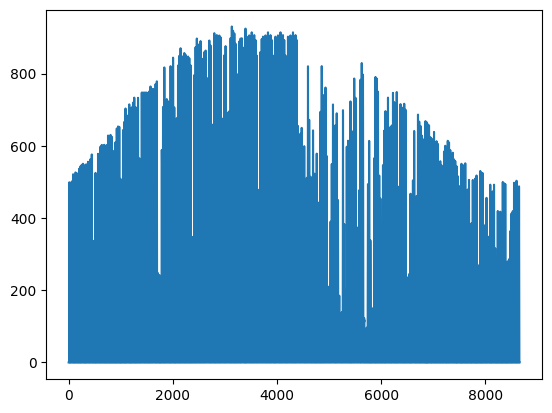

In [59]:
X = np.arange(len(df2))
Y = df2['NDNSW'].tolist()
plt.plot(X, Y);

In [70]:
Y = np.array(Y)
Y[:3]

array([0., 0., 0.])

In [103]:
# Y_aug, X_aug = tsaug.AddNoise(distr="gaussian").augment(Y, X)
Y_aug, X_aug = tsaug.AddNoise(distr='gaussian', prob =0.5).augment(Y, X)
Y_aug = [0 if x<0 else x for x in Y_aug ]
draw_plot_px('Adding Noise', X_aug, Y_aug, 'gaussian')

In [104]:
Y[:50]

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         6.26611328, 117.95800781, 275.73396645, 402.32391896,
       478.81313669, 499.00406719, 461.33311559, 372.85858582,
       242.32501175,  89.66155495,   1.97216797,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         2.41113281,  34.54980469,  83.95569623, 139.56890132,
       344.89611078, 467.96284009, 467.51328325, 387.30064225,
       251.64461934,  94.19405916,   2.30786133,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ])

In [105]:
Y_aug[:50]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.26611328125,
 117.9580078125,
 275.73396644999997,
 402.3239189625,
 478.8131366875,
 499.0040671875,
 461.3331155875,
 372.858585825,
 242.32501175,
 89.66155495375,
 1.97216796875,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.4111328125,
 34.5498046875,
 83.95569622625,
 139.56890131625,
 344.896110775,
 467.9628400875,
 467.51328325,
 387.30064225,
 251.6446193375,
 94.1940591625,
 2.307861328125,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [25]:

import numpy as np
import pandas as pd
from tsaug import TimeWarp, Crop, Quantize, Drift, Reverse

# # df = pd.DataFrame({"timestamp": [1, 2],"cas_pre": [687.982849, 693.427673], "fl_rat": [1627.040283, 1506.217285]})

# my_aug = (    
#     Drift(max_drift=(0.1, 0.5))
# )

# aug = my_aug.augment(df1_avg_df[nwp_cols+['OT']].to_numpy())

# print("Input:")
# print(df1_avg_df[nwp_cols+["OT"]]) #debug
# print("Output:")
# aa=pd.DataFrame(aug,columns=nwp_cols+["OT"]).head()
# print(aa)

Input:
      lead_hr  NDNSW  SWDIR  SWDIF  TDSWS      NDNLW       OULWT        DLWS  \
0        24.0    0.0    0.0    0.0    0.0 -97.473347  219.277454  172.605731   
1        25.0    0.0    0.0    0.0    0.0 -96.125923  218.174744  173.348519   
2        26.0    0.0    0.0    0.0    0.0 -94.406160  216.838947  174.869894   
3        27.0    0.0    0.0    0.0    0.0 -92.614700  215.813910  176.629124   
4        22.0    0.0    0.0    0.0    0.0 -90.299006  215.387032  178.817337   
...       ...    ...    ...    ...    ...        ...         ...         ...   
8653     25.0    0.0    0.0    0.0    0.0 -86.959589  241.831007  215.503072   
8654     26.0    0.0    0.0    0.0    0.0 -92.326929  241.695374  208.715595   
8655     27.0    0.0    0.0    0.0    0.0 -94.058113  240.660345  205.774523   
8656     22.0    0.0    0.0    0.0    0.0 -94.402382  240.069799  204.410347   
8657     23.0    0.0    0.0    0.0    0.0 -93.945663  239.388309  204.048315   

      NCPCP  SNOL  ...          

# clean data

In [12]:
df1_median_df

,date,lead_hr,NDNSW,SWDIR,SWDIF,TDSWS,NDNLW,OULWT,DLWS,HPBLA,...,50MU-min,50MV-min,50MU-max,50MV-max,PRMSL,SNOAL,TMP-SFC,HPBL,PRES,OT
0,2022-01-01 00:00:00,24.0,0.0,0.0,0.0,0.0,-98.075005,219.851212,172.982445,87.328657,...,7.579865,-6.054957,8.062974,-5.262712,102832.19140,0.068630,263.289894,87.324636,97936.800785,0.0
1,2022-01-01 01:00:00,25.0,0.0,0.0,0.0,0.0,-96.897461,218.275558,173.728424,87.331555,...,7.561883,-6.685020,7.826198,-6.035815,102833.61325,0.032394,263.201538,87.318454,97938.468750,0.0
2,2022-01-01 02:00:00,26.0,0.0,0.0,0.0,0.0,-94.875656,217.034203,175.225677,87.312500,...,6.979198,-7.411609,7.560398,-6.647748,102855.92185,0.032394,263.185158,87.315242,97964.730470,0.0
3,2022-01-01 03:00:00,27.0,0.0,0.0,0.0,0.0,-93.174942,216.737556,176.756798,87.312500,...,6.819162,-7.395008,7.008526,-6.601005,102834.91800,0.032394,263.142097,87.322196,97952.230470,0.0
4,2022-01-01 04:00:00,22.0,0.0,0.0,0.0,0.0,-91.245781,215.568481,178.608589,88.227830,...,6.017529,-7.387438,6.589435,-7.015603,102812.95705,0.032394,263.119423,88.213567,97934.273440,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2022-12-31 19:00:00,25.0,0.0,0.0,0.0,0.0,-91.792213,241.717857,210.407063,134.512183,...,7.141700,-5.566147,7.611119,-4.900350,102750.52735,1.675903,270.728889,134.524457,97910.546880,0.0
8756,2022-12-31 20:00:00,26.0,0.0,0.0,0.0,0.0,-93.129745,241.581863,206.647041,80.885951,...,7.126184,-5.513263,7.695150,-4.728871,102742.83205,1.675903,270.354271,80.874980,97897.542970,0.0
8757,2022-12-31 21:00:00,27.0,0.0,0.0,0.0,0.0,-93.594025,240.482269,205.584580,82.685315,...,7.074616,-5.620448,7.435630,-5.028734,102745.14845,1.675903,270.178299,82.668052,97904.769535,0.0
8758,2022-12-31 22:00:00,22.0,0.0,0.0,0.0,0.0,-93.959251,239.934807,204.755966,84.112757,...,6.647643,-5.763250,7.026189,-5.258772,102757.39845,1.675903,269.941307,84.079206,97914.105470,0.0
